# Лінійна регресія і стохастичний градієнтний спуск

Завдання засноване на матеріалах лекцій з лінійної регресії і градиентному спуску. Ви будете прогнозувати виручку компанії в залежності від рівня її інвестицій в рекламу на TV, в газетах і по радіо.

## Ви навчитеся:
- вирішувати задачу відновлення лінійної регресії
- реалізовувати стохастичний градієнтний спуск для її налаштування
- вирішувати задачу лінійної регресії аналітично

## Вступ
Лінійна регресія - один з найбільш добре вивчених методів машинного навчання, що дозволяє прогнозувати значення кількісної ознаки у вигляді лінійної комбінації інших ознак з параметрами - вагами моделі. Оптимальні (в сенсі мінімальності деякого функціоналу помилки) параметри лінійної регресії можна знайти аналітично за допомогою нормального рівняння або чисельно за допомогою методів оптимізації.

Лінійна регресія використовує простий функціонал якості - середньоквадратичну помилку. Ми будемо працювати з вибіркою, що містить 3 ознаки. Для налаштування параметрів (ваг) моделі вирішується наступне завдання:
$$\Large \frac {1} {\ell} \sum_{i = 1} ^ \ell {{((w_0 + w_1x_{i1} + w_2x_{i2} + w_3x_{i3}) - y_i)} ^ 2 } \rightarrow \min_{w_0, w_1, w_2, w_3},$$
де $x_{i1}, x_{i2}, x_{i3}$ - значення ознак $i$ -го об'єкта, $y_i$ - значення цільового показника $i$ -го об'єкта, $\ell$ - число об'єктів в навчальній вибірці.

## Градієнтний спуск
Параметри $w_0, w_1, w_2, w_3$, за якими мінімізується середньоквадратична помилка, можна знаходити чисельно за допомогою градієнтного спуску.
Метод найшвидшого крок для ваг буде виглядати наступним чином:
$$\Large w_0 \leftarrow w_0 - \frac {2 \eta} {\ell} \sum_{i = 1} ^ \ell {{((w_0 + w_1x_{i1} + w_2x_{i2} + w_3x_{i3} ) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac {2 \eta} {\ell} \sum_{i = 1} ^ \ell {{x_{ij} ((w_0 + w_1x_{i1} + w_2x_{i2} + w_3x_{i3}) - y_i)}}, j\in\{1,2,3\}$$
Тут $\eta$ - параметр, крок градієнтного спуску.

## Стохастичний градієнтний спуск
Проблема градієнтного спуску, описаного вище, в тому, що на великих вибірках вважати на кожному кроці градієнт по всіх наявних даних може бути дуже обчислювально складно.
У стохастичною варіанті градієнтного спуску поправки для ваг обчислюються тільки з урахуванням одного випадково взятого об'єкта навчальної вибірки:
$$\Large w_0 \leftarrow w_0 - \frac{2 \eta} {\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} + w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2 \eta} {\ell} {x_{kj} ((w_0 + w_1x_{k1} + w_2x_{k2} + w_3x_{k3}) - y_k)}, \ j \in \{1,2,3 \},$$
де $k$ - випадковий індекс, $k \in \{1, \ldots, \ell \}$.

## Нормальне рівняння
Знаходження вектора оптимальних ваг $w$ може бути занайдено і аналітично.
Ми хочемо знайти такий вектор ваг $w$, щоб вектор $y$, що наближує цільову ознаку, виходив множенням матриці $X$ (що складається з усіх ознак об'єктів навчальної вибірки, крім цільового) на вектор ваг $w$. Тобто, щоб виконувалося матричне рівняння:
$$\Large y = Xw$$
Домноженіем зліва на $X ^ T$ отримуємо:
$$\Large X ^ Ty = X ^ TXw$$
Це добре, оскільки тепер матриця $X ^ TX$ - квадратна, і можна знайти рішення (вектор $w$) у вигляді:
$$\Large  {(X ^ TX)} ^ {- 1} X ^ Ty = w$$
Матриця ${(X ^ TX)} ^ {- 1} X ^ T$ - [*псевдообернених*] (https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матриці $ X $. У NumPy таку матрицю можна обчислити за допомогою функції [numpy.linalg.pinv] (http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однак, знаходження псевдообернена матриця - операція обчислювально складна і нестабільна в разі малого визначника матриці $X$ (проблема мультиколінеарності).
На практиці краще знаходити вектор ваг $w$ рішенням матричного рівняння
$$\Large X ^ TXw = X ^ Ty$$ Це може бути зроблено за допомогою функції [numpy.linalg.solve] (http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/ numpy.linalg.solve.html).

Але все ж на практиці для великих матриць $X$ швидше працює градієнтний спуск, особливо його стохастична версія.

## Інструкції з виконання

**1. Завантажте дані з файлу *advertising.csv* в об'єкт pandas DataFrame. [Джерело даних] (http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [203]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Подивіться на перші 5 записів і на статистику ознак в цьому наборі даних.**

In [204]:
# Ваш код 
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [205]:
# Ваш код
adver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


**Створіть масиви NumPy *X* з стовпців TV, Radio і Newspaper і *y* - з колонки Sales. Використовуйте атрибут *values* об'єкта pandas DataFrame.**

In [206]:
X = adver_data.drop('Sales', axis=1).values  # Ваш код 
y = adver_data['Sales'].values               # Ваш код 

**відмасштабуйте стовпці матриці *X*, вирахувавши з кожного значення середнє за відповідним стовпцем і поділивши результат на стандартне відхилення. Для визначеності, використовуйте методи mean і std векторів NumPy (реалізація std в Pandas може відрізнятися). Зверніть увагу, що в numpy виклик функції .mean () без параметрів повертає середнє по всіх елементах масиву, а не за стовпцями, як в pandas. Щоб зробити обчислення за стовпцями, необхідно вказати параметр axis.**

In [207]:
import numpy as np  # Ваш код

In [208]:
means = np.mean(X, axis=0)  # Ваш код
stds = np.std(X, axis=0)

In [209]:
means, stds

(array([147.0425,  23.264 ,  30.554 ]),
 array([85.63933176, 14.80964564, 21.72410606]))

In [210]:
X = (X-means)/stds # Ваш код 

**Додайте до матриці *X* стовпець з одиниць, використовуючи методи *hstack*, *ones* і *reshape* бібліотеки NumPy. Вектор з одиниць потрібен для того, щоб не обробляти окремо коефіцієнт $w_0$ лінійної регресії.**

In [211]:
import numpy as np
X = np.hstack((np.ones((X.shape[0],1)), X)) # Ваш код

**2. Реалізуйте функцію *mserror* - середньоквадратичну помилку прогнозу. Вона приймає два аргументи - об'єкти Series *y* (значення цільового показника) і *y\_pred* (передбачені значення). Не використовуйте в цій функції цикли - тоді вона буде обчислювально неефективною.**

In [212]:
def mserror(y, y_pred):
    # Ваш код 
    return sum((y-y_pred)**2) / y.shape[0] 

**Яка середньоквадратична помилка прогнозу значень Sales, якщо завжди передбачати медіанне значення Sales по вихідній вибірці? Отриманий результат, округлений до 3 знаків після коми, є відповіддю на *'1 завдання'.***

In [213]:
answer1 = mserror(y, np.median(y))  # Ваш код 
print(round(answer1, 3))
def write_answer_1(answer):
    answers = [answer]
    with open("answer_1.txt", "w") as fout:
        fout.write(" ".join([str(round(num, 3)) for num in answers]))
write_answer_1(answer1)


28.346


**3. Реалізуйте функцію *normal_equation*, яка за заданими матрицями (масивів NumPy) *X* і *y* обчислює вектор ваг $w$ згідно нормальному рівнянню лінійної регресії.**    $ w = {(X ^ TX)} ^ {- 1} X ^ Ty$

In [214]:
def normal_equation(X, y):
    return np.dot(np.linalg.pinv(X), y)  # Ваш код 

In [215]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[14.0225      3.91925365  2.79206274 -0.02253861]


**Які продажу передбачаються лінійної моделлю з вагами, знайденими за допомогою нормального рівняння, в разі середніх інвестицій в рекламу по ТБ, радіо і в газетах? (Тобто при нульових значеннях масштабованих ознак TV, Radio і Newspaper). Отриманий результат, округлений до 3 знаків після коми, є відповіддю на *'2 завдання'*.**

In [216]:
answer2 = np.dot(norm_eq_weights, np.mean(X, axis=0)) # Ваш код
print(round(answer2, 3))
def write_answer_2(answer):
    answers = [answer]
    with open("answer_2.txt", "w") as fout:
        fout.write(" ".join([str(round(num, 3)) for num in answers]))
write_answer_2(answer2)


14.022


**4. Напишіть функцію *linear_prediction*, яка приймає на вхід матрицю *X* і вектор ваг лінійної моделі *w*, а повертає вектор прогнозів у вигляді лінійної комбінації стовпців матриці *X* з вагами *w*.**

In [217]:
def linear_prediction(X, w):
    # Ваш код 
    return np.dot(X, w)

**Яка середньоквадратична помилка прогнозу значень Sales у вигляді лінійної моделі з вагами, знайденими за допомогою нормального рівняння?
Отриманий результат, округлений до 3 знаків після коми, є відповіддю на *'3 завдання'***

In [218]:
answer3 = mserror(y, linear_prediction(X,norm_eq_weights)) # Ваш код 
print(round(answer3, 3))
def write_answer_3(answer):
    answers = [answer]
    with open("answer_3.txt", "w") as fout:
        fout.write(" ".join([str(round(num, 3)) for num in answers]))
write_answer_3(answer3)


2.784


**5. Напишіть функцію *stochastic_gradient_step*, що реалізує крок стохастичного градієнтного спуску для лінійної регресії. Функція повинна приймати матрицю *X*, вектора *y* і *w*, число *train_ind* - індекс об'єкта навчальної вибірки (рядки матриці *X*), за яким вважається зміна ваг, а також число *$\eta$* ( eta) - крок градієнтного спуску (за замовчуванням *eta* = 0.01). Результатом буде вектор оновлених ваг. Наша реалізація функції буде явно написана для даних з 3 ознаками, але нескладно модифікувати для будь-якого числа ознак, можете це зробити.**

In [219]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    difference = linear_prediction(X[train_ind],w) - y[train_ind]  # Ваш код 
    grad0 = difference                          # Ваш код 
    grad1 = X[train_ind, 1]*difference          # Ваш код 
    grad2 = X[train_ind, 2]*difference          # Ваш код 
    grad3 = X[train_ind, 3]*difference          # Ваш код 
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

**6. Напишіть функцію *stochastic_gradient_descent*, що реалізує стохастический градієнтний спуск для лінійної регресії. Функція приймає на вхід наступні аргументи:**
- X - матриця, відповідна навчальній вибірці
- y - вектор значень цільового ознаки
- w_init - вектор початкових ваг моделі
- eta - крок градієнтного спуску (за замовчуванням 0.01)
- max_iter - максимальне число ітерацій градієнтного спуску (за замовчуванням 10000)
- max_weight_dist - максимальне евклідова відстань між векторами ваг на сусідніх ітераціях градієнтного спуску,
при якому алгоритм припиняє роботу (за замовчуванням 1e-8)
- seed - число, яке використовується для відтворюваності згенерованих псевдовипадкових чисел (за замовчуванням 42)
- verbose - прапор друку інформації (наприклад, для налагодження, за замовчуванням False)

**На кожній ітерації в вектор (список) має записуватися поточне значення середньоквадратичної помилки. Функція повинна повертати вектор ваг $w$, а також вектор (список) помилок.**

In [220]:
def stochastic_gradient_descent (X, y, w_init, eta = 1e-2, max_iter = 1e4,
                                min_weight_dist = 1e-8, seed = 42, verbose = False):
    # Ініціалізувавши відстань між векторами ваг на сусідніх
    # ітераціях великим числом.
    weight_dist = np.inf
    # Ініціалізувавши вектор ваг
    w = w_init
    # Сюди будемо записувати помилки на кожній ітерації
    errors = []
    # Лічильник ітерацій
    iter_num = 0
    # Будемо породжувати псевдовипадкові числа
    # (Номер об'єкта, який буде змінювати ваги), а для відтворюваності
    # цієї послідовності псевдовипадкових чисел використовуємо seed.
    np.random.seed (seed)
        
    # Основний цикл
    while weight_dist> min_weight_dist and iter_num <max_iter:
        # Породжуємо псевдовипадковий
        # індекс об'єкта навчальної вибірки
        random_ind = np.random.randint (X.shape [0])
        
        # Ваш код
        #w0 = w
        w = stochastic_gradient_step(X, y, w, random_ind, eta)
        errors.append(mserror(y, linear_prediction(X,w)))
        #weight_dist = np.sqrt(np.dot(w-w0, w-w0))
        iter_num = iter_num+1
        
    if verbose == True:
        print(w, errors)
    #print(iter_num)
    
    return w, errors

**Запустіть $10^5$ ітерацій стохастичного градієнтного спуску. Вкажіть вектор початкових ваг *w_init*, що складається з нулів. Залиште параметри *eta* і *seed* рівними їх значенням за замовчуванням (*eta* = 0.01, *seed* = 42 - це важливо для перевірки відповідей).**

In [221]:
%%time
# Ваш код 
w_init = np.array([0,0,0,0])
max_iter = 1e5
eta = 0.01
ans = stochastic_gradient_descent(X, y, w_init, eta, max_iter)
stoch_grad_desc_weights = ans[0]        
stoch_errors_by_iter =  ans[1]          

Wall time: 5.22 s


**Подивимося, чому дорівнює помилка на перших 50 ітераціях стохастичного градієнтного спуску. Бачимо, що помилка не обов'язково зменшується на кожній ітерації.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

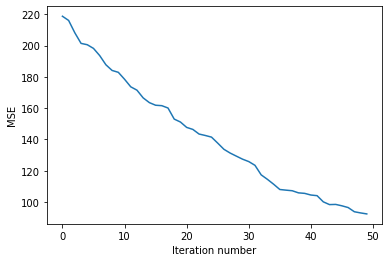

In [222]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Тепер подивимося на залежність помилки від номера ітерації для $ 10 ^ 5 $ ітерацій стохастичного градієнтного спуску. Бачимо, що алгоритм сходиться.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

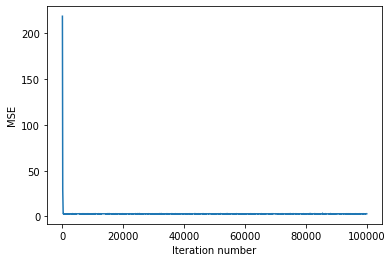

In [223]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Подивимося на вектор ваг, до якого зійшовся метод.**

In [224]:
stoch_grad_desc_weights

array([14.00362253,  3.91635318,  3.01061487,  0.11868927])

**Подивимося на середньоквадратичнепомилку на останній ітерації.**

In [225]:
stoch_errors_by_iter[-1]

2.873944824177364

**Яка середньоквадратична помилка прогнозу значень Sales у вигляді лінійної моделі з вагами, знайденими за допомогою градієнтного спуску? Отриманий результат, округлений до 3 знаків після коми, є відповіддю на *'4 завдання'*.**

In [226]:
answer4 = mserror(y, linear_prediction(X,stoch_grad_desc_weights)) # Ваш код 
print(round(answer4, 3))
def write_answer_4(answer):
    answers = [answer]
    with open("answer_4.txt", "w") as fout:
        fout.write(" ".join([str(round(num, 3)) for num in answers]))
write_answer_4(answer4)


2.874


## Завантажте в classroom ваш файл КП02_Прізвище_linreg_stochastic_grad_descent.ipynb та отримані відповіді з файлів answer_1.txt, answer_2.txt, answer_3.txt,answer_4.txt